# This notebook is to examine three dataset from the literature and compile a hybrid dataset

In [ ]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install arabic_reshaper

In [ ]:
!pip install python-bidi

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display

# ArCOV19 Dataset

In [ ]:
# Importing the dataset
ArCOV19_dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/ArCOV19-Rumors/ArCOV19-Rumors-Dataset.csv')

In [ ]:
print("Number of data points: ", len(ArCOV19_dataset))
ArCOV19_dataset.head(10)

Number of data points:  3584


tweetID  label                                          tweetText
0  1.241080e+18  False  ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ...
1  1.241090e+18  False  ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ...
2  1.241120e+18  False  ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ...
3  1.221790e+18  False  ŸÅŸäÿØŸäŸà| #ÿ£ŸÖÿ±ŸäŸÉÿß ÿ™ÿ™ŸÜÿ®ÿ£ ÿ®ŸÄ¬´#ŸÉŸàÿ±ŸàŸÜÿß¬ª ŸÖŸÜÿ∞ 9 ÿ≥ŸÜŸàÿßÿ™ Ÿà...
4  1.237780e+18  False  ÿ™ÿ≠ÿØÿ´ ÿπŸÜ ÿßŸÑÿµŸäŸÜ ŸàÿßŸÑÿÆŸÅÿßŸÅŸäÿ¥.. ŸÅŸäŸÑŸÖ ¬´ŸÉŸàŸÜÿ™Ÿäÿ¨ŸÜ¬ª ÿ™ŸÜÿ®ÿ£ ...
5  1.222230e+18  False  Ÿáÿ∞ÿß ÿßŸÑŸÅŸäŸÑŸÖ ÿ™ŸÜÿ®ÿ£ ÿ®ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑÿ¨ÿØŸäÿØ: ŸàÿßŸÑŸÜŸáÿßŸäÿ©...
6  1.244310e+18  False  ŸÅŸäŸÑŸÖ ¬´ÿπÿØŸàŸâ ŸÄŸÄ Contagion¬ªÿå ÿßŸÜÿ™ÿ¨ ÿπÿßŸÖ 2011ÿå Ÿàÿ™ŸÜÿ®ÿ£...
7  1.237020e+18  False  ŸÅŸäŸÑŸÖ ÿßŸÖÿ±ŸäŸÉŸä Ÿäÿ™ŸÜÿ®ÿ£ ÿ®ŸÖÿ±ÿ∂ #ŸÉŸàÿ±ŸÜÿß ŸÖŸÜ ÿπÿ¥ÿ± ÿ≥ŸÜŸàÿßÿ™ ÿ®ÿßŸÑ...
8  1.225920e+18  False  ŸÅŸäŸÑŸÖ #Contagion ÿ•ŸÜÿ™ÿßÿ¨ 2011\nŸÅŸäŸÑŸÖ Ÿäÿ™ŸÜÿ®ÿ£ ÿ®ŸÅŸäÿ±Ÿàÿ≥ ...
9  1.226600e+18  False  ŸÅŸäŸÑŸÖ "ÿßŸÑÿπÿØŸàŸâ" #Contagion  ÿπÿ±ÿ∂ ÿ≥ŸÜÿ© 2011 Ÿáÿ∞ÿß ÿßŸÑŸÅ...

In [ ]:
ArCOV19_dataset=ArCOV19_dataset.drop(labels='tweetID', axis=1)
ArCOV19_dataset["label"].replace({True: "True", False: "False"}, inplace=True)
print("Number of data points: ", len(ArCOV19_dataset))
ArCOV19_dataset.head(10)

Number of data points:  3584


label                                          tweetText
0  False  ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ...
1  False  ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ...
2  False  ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ...
3  False  ŸÅŸäÿØŸäŸà| #ÿ£ŸÖÿ±ŸäŸÉÿß ÿ™ÿ™ŸÜÿ®ÿ£ ÿ®ŸÄ¬´#ŸÉŸàÿ±ŸàŸÜÿß¬ª ŸÖŸÜÿ∞ 9 ÿ≥ŸÜŸàÿßÿ™ Ÿà...
4  False  ÿ™ÿ≠ÿØÿ´ ÿπŸÜ ÿßŸÑÿµŸäŸÜ ŸàÿßŸÑÿÆŸÅÿßŸÅŸäÿ¥.. ŸÅŸäŸÑŸÖ ¬´ŸÉŸàŸÜÿ™Ÿäÿ¨ŸÜ¬ª ÿ™ŸÜÿ®ÿ£ ...
5  False  Ÿáÿ∞ÿß ÿßŸÑŸÅŸäŸÑŸÖ ÿ™ŸÜÿ®ÿ£ ÿ®ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑÿ¨ÿØŸäÿØ: ŸàÿßŸÑŸÜŸáÿßŸäÿ©...
6  False  ŸÅŸäŸÑŸÖ ¬´ÿπÿØŸàŸâ ŸÄŸÄ Contagion¬ªÿå ÿßŸÜÿ™ÿ¨ ÿπÿßŸÖ 2011ÿå Ÿàÿ™ŸÜÿ®ÿ£...
7  False  ŸÅŸäŸÑŸÖ ÿßŸÖÿ±ŸäŸÉŸä Ÿäÿ™ŸÜÿ®ÿ£ ÿ®ŸÖÿ±ÿ∂ #ŸÉŸàÿ±ŸÜÿß ŸÖŸÜ ÿπÿ¥ÿ± ÿ≥ŸÜŸàÿßÿ™ ÿ®ÿßŸÑ...
8  False  ŸÅŸäŸÑŸÖ #Contagion ÿ•ŸÜÿ™ÿßÿ¨ 2011\nŸÅŸäŸÑŸÖ Ÿäÿ™ŸÜÿ®ÿ£ ÿ®ŸÅŸäÿ±Ÿàÿ≥ ...
9  False  ŸÅŸäŸÑŸÖ "ÿßŸÑÿπÿØŸàŸâ" #Contagion  ÿπÿ±ÿ∂ ÿ≥ŸÜÿ© 2011 Ÿáÿ∞ÿß ÿßŸÑŸÅ...

In [ ]:
def preprocess_tweet(tweet):

  temp = tweet.strip()
  #temp = re.sub(r'http(\S)+', ' ', temp)
  #temp = re.sub(r'www(\S)+', ' ', temp)
  temp = temp.replace('\n', ' ')
  temp= temp.strip()
  temp= temp.rstrip('\.')
  return temp


'''def preprocess_tweet(tweet):

  temp = tweet.strip()
  temp = re.sub(r'http(\S)+', ' ', temp)
  temp = re.sub(r'www(\S)+', ' ', temp)
  temp = temp.replace('\n', ' ')
  temp = re.sub(r'[\'\"\#)]', '',temp)
  temp = re.sub(r'[\#\-\_]', ' ', temp)
  temp = re.sub(r'[\¬ª\¬´]', '', temp)
  temp= temp.strip()
  temp= temp.rstrip('\.')
  return temp
  '''

'def preprocess_tweet(tweet):\n\n  temp = tweet.strip()\n  temp = re.sub(r\'http(\\S)+\', \' \', temp)\n  temp = re.sub(r\'www(\\S)+\', \' \', temp)\n  temp = temp.replace(\'\n\', \' \')\n  temp = re.sub(r\'[\'"\\#)]\', \'\',temp)\n  temp = re.sub(r\'[\\#\\-\\_]\', \' \', temp)\n  temp = re.sub(r\'[\\¬ª\\¬´]\', \'\', temp)\n  temp= temp.strip()\n  temp= temp.rstrip(\'\\.\')\n  return temp\n  '

In [ ]:
for i in  range(10):
  print(ArCOV19_dataset["tweetText"][i])
  print(preprocess_tweet(str(ArCOV19_dataset["tweetText"][i])))
  print("")

ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ ÿßŸÑŸÅŸÜŸäÿ© ÿ®ÿ∏ŸáŸàÿ± ÿ£Ÿàÿ®ÿ¶ÿ© ŸÖÿ¥ÿßÿ®Ÿáÿ© ŸàŸàÿ∂ÿπ ŸÖÿµŸäÿ± ÿßŸÑÿπÿßŸÑŸÖ ŸÅŸä ÿÆÿ∑ÿ±ÿå ÿ£ÿ¥Ÿáÿ±Ÿáÿß ŸÅŸäŸÑŸÖ  "Contagion" ÿπÿßŸÖ 2011. https://t.co/r3frLwvG0K
ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ ÿßŸÑŸÅŸÜŸäÿ© ÿ®ÿ∏ŸáŸàÿ± ÿ£Ÿàÿ®ÿ¶ÿ© ŸÖÿ¥ÿßÿ®Ÿáÿ© ŸàŸàÿ∂ÿπ ŸÖÿµŸäÿ± ÿßŸÑÿπÿßŸÑŸÖ ŸÅŸä ÿÆÿ∑ÿ±ÿå ÿ£ÿ¥Ÿáÿ±Ÿáÿß ŸÅŸäŸÑŸÖ  "Contagion" ÿπÿßŸÖ 2011. https://t.co/r3frLwvG0K

ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ ÿßŸÑŸÅŸÜŸäÿ© ÿ®ÿ∏ŸáŸàÿ± ÿ£Ÿàÿ®ÿ¶ÿ© ŸÖÿ¥ÿßÿ®Ÿáÿ© ŸàŸàÿ∂ÿπ ŸÖÿµŸäÿ± ÿßŸÑÿπÿßŸÑŸÖ ŸÅŸä ÿÆÿ∑ÿ±ÿå ÿ£ÿ¥Ÿáÿ±Ÿáÿß ŸÅŸäŸÑŸÖ  "Contagion" ÿπÿßŸÖ 2011. https://t.co/JFlaHCeuyV
ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ ÿßŸÑŸÅŸÜŸäÿ© ÿ®ÿ∏ŸáŸàÿ± ÿ£Ÿàÿ®ÿ¶ÿ© ŸÖÿ¥ÿßÿ®Ÿáÿ© ŸàŸàÿ∂ÿπ ŸÖÿµŸäÿ± ÿßŸÑÿπÿßŸÑŸÖ ŸÅŸä ÿÆÿ∑ÿ±ÿå ÿ£ÿ¥Ÿáÿ±Ÿáÿß ŸÅŸäŸÑŸÖ  "Contagion" ÿπÿßŸÖ 2011. https://t.co/JFlaHCeuyV

In [ ]:
ArCOV19_dataset['tweetText'] = ArCOV19_dataset['tweetText'].map(lambda x: preprocess_tweet(str(x)))

In [ ]:
ArCOV19_dataset_unique=ArCOV19_dataset.drop_duplicates(subset=['tweetText'])
ArCOV19_dataset_unique.reset_index(inplace = True)
ArCOV19_dataset_unique=ArCOV19_dataset_unique.drop(labels='index', axis=1)
print("Number of data points: ", len(ArCOV19_dataset_unique))

Number of data points:  3456


In [ ]:
ArCOV19_dataset_unique.head(20)

label                                          tweetText
0   False  ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ...
1   False  ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ...
2   False  ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ...
3   False  ŸÅŸäÿØŸäŸà| #ÿ£ŸÖÿ±ŸäŸÉÿß ÿ™ÿ™ŸÜÿ®ÿ£ ÿ®ŸÄ¬´#ŸÉŸàÿ±ŸàŸÜÿß¬ª ŸÖŸÜÿ∞ 9 ÿ≥ŸÜŸàÿßÿ™ Ÿà...
4   False  ÿ™ÿ≠ÿØÿ´ ÿπŸÜ ÿßŸÑÿµŸäŸÜ ŸàÿßŸÑÿÆŸÅÿßŸÅŸäÿ¥.. ŸÅŸäŸÑŸÖ ¬´ŸÉŸàŸÜÿ™Ÿäÿ¨ŸÜ¬ª ÿ™ŸÜÿ®ÿ£ ...
5   False  Ÿáÿ∞ÿß ÿßŸÑŸÅŸäŸÑŸÖ ÿ™ŸÜÿ®ÿ£ ÿ®ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑÿ¨ÿØŸäÿØ: ŸàÿßŸÑŸÜŸáÿßŸäÿ©...
6   False  ŸÅŸäŸÑŸÖ ¬´ÿπÿØŸàŸâ ŸÄŸÄ Contagion¬ªÿå ÿßŸÜÿ™ÿ¨ ÿπÿßŸÖ 2011ÿå Ÿàÿ™ŸÜÿ®ÿ£...
7   False  ŸÅŸäŸÑŸÖ ÿßŸÖÿ±ŸäŸÉŸä Ÿäÿ™ŸÜÿ®ÿ£ ÿ®ŸÖÿ±ÿ∂ #ŸÉŸàÿ±ŸÜÿß ŸÖŸÜ ÿπÿ¥ÿ± ÿ≥ŸÜŸàÿßÿ™ ÿ®ÿßŸÑ...
8   False  ŸÅŸäŸÑŸÖ #Contagion ÿ•ŸÜÿ™ÿßÿ¨ 2011 ŸÅŸäŸÑŸÖ Ÿäÿ™ŸÜÿ®ÿ£ ÿ®ŸÅŸäÿ±Ÿàÿ≥ #...
9   False  ŸÅŸäŸÑŸÖ "ÿßŸÑÿπÿØŸàŸâ" #Contagion  ÿπÿ±ÿ∂ ÿ≥ŸÜÿ© 2011 Ÿáÿ∞ÿß ÿßŸÑŸÅ...
10   True  ÿßŸÑŸÅŸäÿØŸäŸà ÿßŸÑŸÖÿ™ÿØÿßŸàŸÑ ÿ®ÿπŸÜŸàÿßŸÜ ¬´ÿßŸÑÿµŸäŸÜ ÿ®ÿØÿ£ÿ™ ÿ®ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿß...
11   True  ÿßŸÑŸÅŸäÿØŸäŸà ÿßŸÑŸÖÿ™ÿØÿßŸàŸÑ ÿ®ÿπŸÜŸàÿßŸÜ ¬´ÿßŸÑÿµŸäŸÜ ÿ®ÿØÿ£ÿ™ ÿ®ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿß...
12   True  ÿßŸÑŸÅŸäÿØŸäŸà ÿßŸÑŸÖÿ™ÿØÿßŸàŸÑ ÿ®ÿπŸÜŸàÿßŸÜ ¬´ÿßŸÑÿµŸäŸÜ ÿ®ÿØÿ£ÿ™ ÿ®ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿß...
13   True  ÿßŸÑŸÅŸäÿØŸäŸà ÿßŸÑŸÖÿ™ÿØÿßŸàŸÑ ÿ®ÿπŸÜŸàÿßŸÜ ¬´ÿßŸÑÿµŸäŸÜ ÿ®ÿØÿ£ÿ™ ÿ®ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿß...
14  False  ŸÖÿ¥ÿßŸáÿØ ÿµÿßÿØŸÖÿ© ŸÖŸÜ #ÿßŸÑÿµŸäŸÜ ÿå ÿ™ŸÖ ÿ•ÿπÿØÿßŸÖ ÿπÿØÿ© ŸÖÿµÿßÿ®ŸäŸÜ ÿ®ÿ•...
15  False  ÿßŸÜÿ®ÿßÿ° ÿπŸÜ ÿµÿØŸàÿ± ÿßŸàÿßŸÖÿ± ŸÖŸÜ ÿßŸÑÿ≠ÿ≤ÿ® ÿßŸÑÿ¥ŸäŸàÿπŸä ÿßŸÑÿ≠ÿßŸÉŸÖ ŸÅŸä...
16  False  #ÿ™ÿ±ŸäŸÜÿØŸäŸÜÿ∫_ÿßŸÑÿ¢ŸÜ | ÿßŸÑÿµŸäŸÜ ÿ™ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿßÿ®ŸäŸÜ ÿ®ŸÅŸäÿ±Ÿàÿ≥ #ŸÉ...
17  False  #ŸÉŸàÿ±ŸàŸÜÿß  ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿßÿ®ŸäŸÜ ÿ®ŸÅÿßŸäÿ±Ÿàÿ≥ ŸÉÿ±ŸàŸÜÿß ŸÅŸä ÿ¥Ÿàÿßÿ±ÿπ ÿß...
18  False  #ŸÉŸàÿ±ŸàŸÜÿß_ÿßŸÑÿµŸäŸÜ ÿ≠ÿ≥ÿ® ŸÖÿßŸàÿµŸÑŸÜŸä ÿßŸÑÿßŸÜ Ÿäÿ™ŸÖ ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿßÿ®Ÿä...
19  False  #ŸÉŸàÿ±ŸàŸÜÿß_ÿßŸÑÿ¨ÿØŸäÿØ                                ...

In [ ]:
for i in range(20):
  print(ArCOV19_dataset_unique["tweetText"][i])
  print("")

ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ ÿßŸÑŸÅŸÜŸäÿ© ÿ®ÿ∏ŸáŸàÿ± ÿ£Ÿàÿ®ÿ¶ÿ© ŸÖÿ¥ÿßÿ®Ÿáÿ© ŸàŸàÿ∂ÿπ ŸÖÿµŸäÿ± ÿßŸÑÿπÿßŸÑŸÖ ŸÅŸä ÿÆÿ∑ÿ±ÿå ÿ£ÿ¥Ÿáÿ±Ÿáÿß ŸÅŸäŸÑŸÖ  "Contagion" ÿπÿßŸÖ 2011

ŸÅŸäÿØŸäŸà| #ÿ£ŸÖÿ±ŸäŸÉÿß ÿ™ÿ™ŸÜÿ®ÿ£ ÿ®ŸÄ¬´#ŸÉŸàÿ±ŸàŸÜÿß¬ª ŸÖŸÜÿ∞ 9 ÿ≥ŸÜŸàÿßÿ™ ŸàÿßŸÑÿØŸÑŸäŸÑ ¬´ŸÉŸàŸÜÿ™Ÿäÿ¨ŸÜ¬ª

ÿ™ÿ≠ÿØÿ´ ÿπŸÜ ÿßŸÑÿµŸäŸÜ ŸàÿßŸÑÿÆŸÅÿßŸÅŸäÿ¥.. ŸÅŸäŸÑŸÖ ¬´ŸÉŸàŸÜÿ™Ÿäÿ¨ŸÜ¬ª ÿ™ŸÜÿ®ÿ£ ÿ®ŸÄ¬´#ŸÉŸàÿ±ŸàŸÜÿß¬ª ŸÇÿ®ŸÑ 9 ÿ≥ŸÜŸàÿßÿ™ (ŸÅŸäÿØŸäŸà)

Ÿáÿ∞ÿß ÿßŸÑŸÅŸäŸÑŸÖ ÿ™ŸÜÿ®ÿ£ ÿ®ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑÿ¨ÿØŸäÿØ: ŸàÿßŸÑŸÜŸáÿßŸäÿ© ŸÑŸÖ ÿ™ŸÉŸÜ ÿ≥ÿπŸäÿØÿ©  ÿ£ÿ¥ÿßÿ± ÿπÿ¥ÿßŸÇ ŸÅŸäŸÑŸÖ Contagion ÿ£Ÿà ÿßŸÑÿπÿØŸàŸâÿå ÿßŸÑÿ∞Ÿä ÿµÿØÿ± ÿπÿßŸÖ 2011ÿå ÿ•ŸÑŸâ ÿßŸÑÿ™ÿ¥ÿßÿ®Ÿá ÿ®ŸäŸÜ ÿßŸÑŸÅŸäŸÑŸÖ ŸàŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑÿ¨ÿØŸäÿØ. ŸàŸÅŸä ÿ™ÿπŸÑŸäŸÇÿßÿ™ŸáŸÖ ÿπŸÑŸâ ÿ™ŸàŸäÿ™ÿ±ÿå ŸÉÿ™ÿ®Ÿàÿß: ŸÉŸÑ ÿ¥Ÿäÿ° Ÿäÿ®ÿØŸà ŸÖÿ™ÿ¥ÿßÿ®Ÿáÿß ÿ®ÿ¥ŸÉŸÑ ŸÖÿ±ÿπÿ®ÿå ÿßŸÑÿÆŸÅÿßŸÅŸäÿ¥ ŸÉÿßŸÜÿ™ ÿßŸÑŸÖÿµÿØÿ±. ÿßŸÑŸÅŸäŸÑŸÖ Ÿäÿ≠ÿØÿ´ ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ ÿßŸÑÿ≠ŸÇŸäŸÇŸä ÿßŸÑÿ¢ŸÜ

ŸÅŸäŸÑŸÖ ¬´ÿπÿØŸàŸâ ŸÄŸ

In [ ]:
ArCOV19_dataset_unique.head(20)

label                                          tweetText
0   False  ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± Ÿàÿ®ÿßÿ° #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿßÿå ÿ™ŸÜÿ®ÿ£ÿ™ ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿπŸÖÿßŸÑ...
1   False  ŸÅŸäÿØŸäŸà| #ÿ£ŸÖÿ±ŸäŸÉÿß ÿ™ÿ™ŸÜÿ®ÿ£ ÿ®ŸÄ¬´#ŸÉŸàÿ±ŸàŸÜÿß¬ª ŸÖŸÜÿ∞ 9 ÿ≥ŸÜŸàÿßÿ™ Ÿà...
2   False  ÿ™ÿ≠ÿØÿ´ ÿπŸÜ ÿßŸÑÿµŸäŸÜ ŸàÿßŸÑÿÆŸÅÿßŸÅŸäÿ¥.. ŸÅŸäŸÑŸÖ ¬´ŸÉŸàŸÜÿ™Ÿäÿ¨ŸÜ¬ª ÿ™ŸÜÿ®ÿ£ ...
3   False  Ÿáÿ∞ÿß ÿßŸÑŸÅŸäŸÑŸÖ ÿ™ŸÜÿ®ÿ£ ÿ®ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑÿ¨ÿØŸäÿØ: ŸàÿßŸÑŸÜŸáÿßŸäÿ©...
4   False  ŸÅŸäŸÑŸÖ ¬´ÿπÿØŸàŸâ ŸÄŸÄ Contagion¬ªÿå ÿßŸÜÿ™ÿ¨ ÿπÿßŸÖ 2011ÿå Ÿàÿ™ŸÜÿ®ÿ£...
5   False  ŸÅŸäŸÑŸÖ ÿßŸÖÿ±ŸäŸÉŸä Ÿäÿ™ŸÜÿ®ÿ£ ÿ®ŸÖÿ±ÿ∂ #ŸÉŸàÿ±ŸÜÿß ŸÖŸÜ ÿπÿ¥ÿ± ÿ≥ŸÜŸàÿßÿ™ ÿ®ÿßŸÑ...
6   False  ŸÅŸäŸÑŸÖ #Contagion ÿ•ŸÜÿ™ÿßÿ¨ 2011\nŸÅŸäŸÑŸÖ Ÿäÿ™ŸÜÿ®ÿ£ ÿ®ŸÅŸäÿ±Ÿàÿ≥ ...
7   False  ŸÅŸäŸÑŸÖ "ÿßŸÑÿπÿØŸàŸâ" #Contagion  ÿπÿ±ÿ∂ ÿ≥ŸÜÿ© 2011 Ÿáÿ∞ÿß ÿßŸÑŸÅ...
8    True  ÿßŸÑŸÅŸäÿØŸäŸà ÿßŸÑŸÖÿ™ÿØÿßŸàŸÑ ÿ®ÿπŸÜŸàÿßŸÜ ¬´ÿßŸÑÿµŸäŸÜ ÿ®ÿØÿ£ÿ™ ÿ®ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿß...
9    True  ÿßŸÑŸÅŸäÿØŸäŸà ÿßŸÑŸÖÿ™ÿØÿßŸàŸÑ ÿ®ÿπŸÜŸàÿßŸÜ ¬´ÿßŸÑÿµŸäŸÜ ÿ®ÿØÿ£ÿ™ ÿ®ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿß...
10  False  ŸÖÿ¥ÿßŸáÿØ ÿµÿßÿØŸÖÿ© ŸÖŸÜ #ÿßŸÑÿµŸäŸÜ ÿå ÿ™ŸÖ ÿ•ÿπÿØÿßŸÖ ÿπÿØÿ© ŸÖÿµÿßÿ®ŸäŸÜ ÿ®ÿ•...
11  False  ÿßŸÜÿ®ÿßÿ° ÿπŸÜ ÿµÿØŸàÿ± ÿßŸàÿßŸÖÿ± ŸÖŸÜ ÿßŸÑÿ≠ÿ≤ÿ® ÿßŸÑÿ¥ŸäŸàÿπŸä ÿßŸÑÿ≠ÿßŸÉŸÖ ŸÅŸä...
12  False  #ÿ™ÿ±ŸäŸÜÿØŸäŸÜÿ∫_ÿßŸÑÿ¢ŸÜ | ÿßŸÑÿµŸäŸÜ ÿ™ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿßÿ®ŸäŸÜ ÿ®ŸÅŸäÿ±Ÿàÿ≥ #ŸÉ...
13  False  #ŸÉŸàÿ±ŸàŸÜÿß\n\nŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿßÿ®ŸäŸÜ ÿ®ŸÅÿßŸäÿ±Ÿàÿ≥ ŸÉÿ±ŸàŸÜÿß ŸÅŸä ÿ¥Ÿàÿßÿ±ÿπ...
14  False  #ŸÉŸàÿ±ŸàŸÜÿß_ÿßŸÑÿµŸäŸÜ ÿ≠ÿ≥ÿ® ŸÖÿßŸàÿµŸÑŸÜŸä ÿßŸÑÿßŸÜ Ÿäÿ™ŸÖ ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿßÿ®Ÿä...
15  False  #ŸÉŸàÿ±ŸàŸÜÿß_ÿßŸÑÿ¨ÿØŸäÿØ                                ...
16  False  #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸàÿ±ŸàŸÜÿß_ÿßŸÑÿµŸäŸÜ \nüà≤ ÿ®ÿØÿ™ ÿπŸÖŸÑŸäÿßÿ™  ÿßŸÑÿ™ÿ∑ŸáŸäÿ± ŸÅŸä...
17  False  ŸÅŸäÿØŸäŸà ŸÖÿ™ÿØÿßŸàŸÑ\n\n ÿßŸÑÿµŸäŸÜ ÿ®ÿØÿ£ÿ™ ŸÅŸä ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿßÿ®ŸäŸÜ ÿ®ŸÖ...
18  False  ÿßŸÑÿ¥ÿ±ÿ∑ÿ© ÿßŸÑÿµŸäŸÜŸäÿ© ÿ™ŸÇÿ™ŸÑ ÿßŸÑŸÖÿµÿßÿ®ŸäŸÜ ÿ®ÿß #ŸÉŸàÿ±ŸàŸÜÿß\nŸÅŸä ÿ≠ÿß...
19  False  ŸÖŸÇÿ∑ÿπ ŸÖÿ™ÿØÿßŸàŸÑ ÿπŸÜ ÿßŸÑÿµŸäŸÜ ÿ®ÿØÿ£ÿ™ ŸÅŸä ŸÇÿ™ŸÑ ÿßŸÑŸÖÿ±ÿ∂Ÿâ ÿßŸÑŸÖÿµÿßÿ®...

Text(0.5, 1.0, 'Class Distribution')

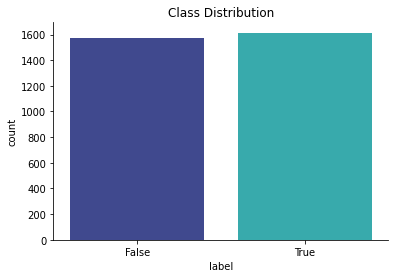

In [ ]:
sns.countplot(x='label', data = ArCOV19_dataset_unique, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [ ]:
ArCOV19_dataset_unique['label'].value_counts()

True     1614
False    1572
Name: label, dtype: int64

In [ ]:
ArCOV19_dataset_unique.to_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/ArCOV19-unique1.csv')

# NLP4IF-COVID-AR

In [ ]:
# Importing the dataset
NLP4IF_dataset_train = pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/NLP4IF-COVID-AR/covid19_disinfo_binary_arabic_train.tsv', sep='\t', header=0)

In [ ]:
print("Number of data points: ", len(NLP4IF_dataset_train))
NLP4IF_dataset_train = NLP4IF_dataset_train.rename({'text': 'tweet_text'}, axis=1)  # new method
NLP4IF_dataset_train.head(5)

Number of data points:  2536


tweet_no  ... q7_label
0         1  ...       no
1         2  ...       no
2         3  ...       no
3         4  ...       no
4         5  ...       no

[5 rows x 9 columns]

In [ ]:
# Importing the dataset
NLP4IF_dataset_dev = pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/NLP4IF-COVID-AR/covid19_disinfo_binary_arabic_dev.tsv', sep='\t', header=0)

In [ ]:
print("Number of data points: ", len(NLP4IF_dataset_dev))
NLP4IF_dataset_dev.head(5)

Number of data points:  520


tweet_no  ... q7_label
0       199  ...       no
1       200  ...       no
2       201  ...       no
3       202  ...       no
4       203  ...       no

[5 rows x 9 columns]

In [ ]:
NLP4IF_dataset_all_list=[NLP4IF_dataset_train, NLP4IF_dataset_dev]
#NLP4IF_dataset_all = pd.concat(NLP4IF_dataset_all_list, keys=["t", "d"])
NLP4IF_dataset_all = pd.concat(NLP4IF_dataset_all_list)
NLP4IF_dataset_all.head(5)

tweet_no  ... q7_label
0         1  ...       no
1         2  ...       no
2         3  ...       no
3         4  ...       no
4         5  ...       no

[5 rows x 9 columns]

In [ ]:
print("Number of data points: ", len(NLP4IF_dataset_all))
NLP4IF_dataset_all=NLP4IF_dataset_all.drop(labels=['tweet_no', 'q1_label','q3_label','q4_label','q5_label','q6_label','q7_label'], axis=1)
NLP4IF_dataset_all = NLP4IF_dataset_all.rename({'q2_label': 'label'}, axis=1)  # new method
NLP4IF_dataset_all.head(5)

Number of data points:  3056


tweet_text label
0  #ÿπÿßÿ¨ŸÑ #ÿÆÿßÿØŸÖ_ÿßŸÑÿ≠ÿ±ŸÖŸäŸÜ_ÿßŸÑÿ¥ÿ±ŸäŸÅŸäŸÜ ŸäÿµÿØÿ± ÿ£ŸÖÿ±Ÿá ÿ®ŸÖŸÜÿπ ÿßŸÑ...    no
1  ÿ®ÿπÿØ ŸÉŸÑ ÿßŸÑÿ•ÿ¨ÿ±ÿßÿ°ÿßÿ™ ÿßŸÑÿßÿ≠ÿ™ÿ±ÿßÿ≤Ÿäÿ© ÿßŸÑÿ™Ÿä ÿ™ŸÇŸàŸÖ ÿ®Ÿáÿß #ÿßŸÑŸÖ...   NaN
2  ÿ™ÿµŸàŸäÿ™ üî¥ .  . ŸáŸÑ ÿ™ÿπÿ™ŸÇÿØ ÿ£ŸÜ ( ÿ≠ÿ∏ÿ± ÿßŸÑÿ™ÿ¨ŸàŸÑ ) ÿßŸÑÿ∞Ÿä ÿ™...   NaN
3                                   ŸÖÿß ŸáŸà ÿØŸä ÿØÿπŸàÿßÿ™ŸÜÿß   NaN
4  #ÿßŸÑÿµÿ≠ÿ© ÿ™ÿπŸÑŸÜ ÿπŸÜ ÿ™ÿ≥ÿ¨ŸäŸÑ (Ÿ°Ÿ°Ÿ©) ÿ≠ÿßŸÑÿ© ÿ•ÿµÿßÿ®ÿ© ÿ¨ÿØŸäÿØÿ© ÿ®ŸÅ...    no

In [ ]:
NLP4IF_dataset_all["label"].replace({"no": "True", "yes": "False"}, inplace=True)
NLP4IF_dataset_all.head(5)

tweet_text label
0  #ÿπÿßÿ¨ŸÑ #ÿÆÿßÿØŸÖ_ÿßŸÑÿ≠ÿ±ŸÖŸäŸÜ_ÿßŸÑÿ¥ÿ±ŸäŸÅŸäŸÜ ŸäÿµÿØÿ± ÿ£ŸÖÿ±Ÿá ÿ®ŸÖŸÜÿπ ÿßŸÑ...  True
1  ÿ®ÿπÿØ ŸÉŸÑ ÿßŸÑÿ•ÿ¨ÿ±ÿßÿ°ÿßÿ™ ÿßŸÑÿßÿ≠ÿ™ÿ±ÿßÿ≤Ÿäÿ© ÿßŸÑÿ™Ÿä ÿ™ŸÇŸàŸÖ ÿ®Ÿáÿß #ÿßŸÑŸÖ...   NaN
2  ÿ™ÿµŸàŸäÿ™ üî¥ .  . ŸáŸÑ ÿ™ÿπÿ™ŸÇÿØ ÿ£ŸÜ ( ÿ≠ÿ∏ÿ± ÿßŸÑÿ™ÿ¨ŸàŸÑ ) ÿßŸÑÿ∞Ÿä ÿ™...   NaN
3                                   ŸÖÿß ŸáŸà ÿØŸä ÿØÿπŸàÿßÿ™ŸÜÿß   NaN
4  #ÿßŸÑÿµÿ≠ÿ© ÿ™ÿπŸÑŸÜ ÿπŸÜ ÿ™ÿ≥ÿ¨ŸäŸÑ (Ÿ°Ÿ°Ÿ©) ÿ≠ÿßŸÑÿ© ÿ•ÿµÿßÿ®ÿ© ÿ¨ÿØŸäÿØÿ© ÿ®ŸÅ...  True

In [ ]:
NLP4IF_dataset_all = NLP4IF_dataset_all[NLP4IF_dataset_all['label'].notna()]
print("Number of data points: ", len(NLP4IF_dataset_all))
NLP4IF_dataset_all.head(5)

Number of data points:  2143


tweet_text  label
0   #ÿπÿßÿ¨ŸÑ #ÿÆÿßÿØŸÖ_ÿßŸÑÿ≠ÿ±ŸÖŸäŸÜ_ÿßŸÑÿ¥ÿ±ŸäŸÅŸäŸÜ ŸäÿµÿØÿ± ÿ£ŸÖÿ±Ÿá ÿ®ŸÖŸÜÿπ ÿßŸÑ...   True
4   #ÿßŸÑÿµÿ≠ÿ© ÿ™ÿπŸÑŸÜ ÿπŸÜ ÿ™ÿ≥ÿ¨ŸäŸÑ (Ÿ°Ÿ°Ÿ©) ÿ≠ÿßŸÑÿ© ÿ•ÿµÿßÿ®ÿ© ÿ¨ÿØŸäÿØÿ© ÿ®ŸÅ...   True
6   #ÿßŸÑÿµÿ≠ÿ© ÿ™ÿπŸÑŸÜ ÿπŸÜ ÿ™ÿ≥ÿ¨ŸäŸÑ (Ÿ¢Ÿ†Ÿ•) ÿ≠ÿßŸÑÿ© ÿ•ÿµÿßÿ®ÿ© ÿ¨ÿØŸäÿØÿ© ÿ®ŸÅ...   True
9   ÿµÿ≠ŸäŸÅÿ© newsweek ÿßŸÑÿ£ŸÖÿ±ŸäŸÉŸäÿ©:ŸáŸÑ ÿ™ÿπÿ±ŸÅ ŸÖŸÜ ÿßŸÑÿ∞Ÿä ÿßŸÇÿ™ÿ±ÿ≠...   True
10  58 ŸÖŸÜ ÿßŸÑ70 ÿ≠ÿßŸÑÿ© ÿßŸÑŸÖÿπŸÑŸÜÿ© ŸÇÿ®ŸÑ ŸÇŸÑŸäŸÑ ŸÑŸÖÿÆÿßŸÑÿ∑ŸäŸÜ ÿ≠ÿ∂ÿ±Ÿà...  False

Text(0.5, 1.0, 'Class Distribution')

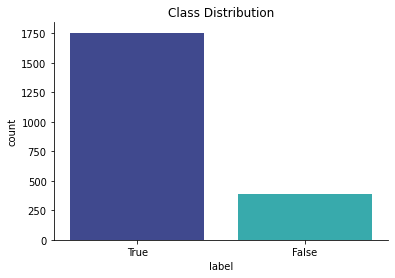

In [ ]:
sns.countplot(x='label', data = NLP4IF_dataset_all, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [ ]:
NLP4IF_dataset_all['label'].value_counts()

True     1755
False     388
Name: label, dtype: int64

In [ ]:
NLP4IF_dataset_all.to_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/NLP4IF-all.csv')

# AraCOVID19-MFH

In [ ]:
# Importing the dataset
AraCOVID19_MFH_dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/AraCOVID19-MFH/AraCOVID19-MFH_V1.csv')

In [ ]:
print("Number of data points: ", len(AraCOVID19_MFH_dataset))
AraCOVID19_MFH_dataset.head(10)

Number of data points:  10828


Tweet_ID  ... Worth_Fact-checking
0  1.250190e+18  ...        Can't decide
1  1.251530e+18  ...                 Yes
2  1.324750e+18  ...                  No
3  1.246540e+18  ...                 Yes
4  1.319990e+18  ...        Can't decide
5  1.254030e+18  ...        Can't decide
6  1.246520e+18  ...               Maybe
7  1.265570e+18  ...        Can't decide
8  1.243540e+18  ...        Can't decide
9  1.329040e+18  ...               Maybe

[10 rows x 12 columns]

In [ ]:
AraCOVID19_MFH_dataset=AraCOVID19_MFH_dataset.drop(labels=['Tweet_ID', 'Blame_Negative_Demoralizing_Speech','Dialect','Factual','Give_Advice','Hate_Speech','News_or_Opinion', 'Rise_Moral',	'Talk_About_Cure_or_Vaccine'	,'Worth_Fact-checking'], axis=1)
AraCOVID19_MFH_dataset = AraCOVID19_MFH_dataset.rename({'Contains_Fake_Information': 'label'}, axis=1)  # new method
AraCOVID19_MFH_dataset["label"].replace({"No": "True", "Yes": "False"}, inplace=True)

In [ ]:
AraCOVID19_MFH_dataset = AraCOVID19_MFH_dataset[(AraCOVID19_MFH_dataset.label != 'Maybe') & (AraCOVID19_MFH_dataset.label != 'Can\'t decide')]
AraCOVID19_MFH_dataset.head(5)

Tweet_Text label
2   Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿµÿ≠ÿ© ÿ™ŸÉÿ¥ŸÅ ÿπŸÜ ÿ•ÿ±ÿ™ŸÅÿßÿπ ÿπÿØÿØ ÿßŸÑÿ•ÿµÿßÿ®ÿßÿ™ ÿßŸÑŸÖÿ§ŸÉÿØ...  True
3   ŸÉŸäŸÅŸäÿ© ÿßŸÑŸàŸÇÿßŸäÿ© ŸÖŸÜ ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑÿ¨ÿØŸäÿØ ŸÑŸÑŸàŸÇÿßŸäÿ© ŸÖ...  True
14  üî¥ ÿßÿ±ÿ™ŸÅÿßÿπ ÿπÿØÿØ ÿßŸÑŸàŸÅŸäÿßÿ™ ÿ®ŸÉŸàÿ±ŸàŸÜÿß ŸÅŸä ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ± ÿ•ŸÑŸâ  3...  True
20  ŸÖÿ™Ÿâ Ÿäÿ¨ÿ® ÿπŸÑŸäŸÉ ÿ∫ÿ≥ŸÑ ÿßŸÑŸäÿØŸäŸÜÿü  #ÿßŸÑŸàŸÇÿßŸäÿ©_ŸÖŸÜ_ŸÉŸàÿ±ŸàŸÜÿß  ...  True
26  ÿ±ÿ≥ŸÖŸäÿßŸã.. #ÿßŸÑÿ±ÿ¶ÿßÿ≥ÿ©_ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±Ÿäÿ© ÿ™ÿ§ŸÉÿØ ÿ•ÿµÿßÿ®ÿ© ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ...  True

Text(0.5, 1.0, 'Class Distribution')

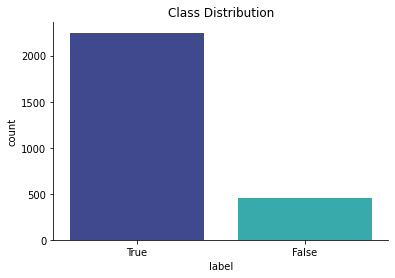

In [ ]:
sns.countplot(x='label', data = AraCOVID19_MFH_dataset, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [ ]:
AraCOVID19_MFH_dataset['label'].value_counts()

True     2249
False     459
Name: label, dtype: int64

In [ ]:
AraCOVID19_MFH_dataset.to_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/AraCOVID19_MFH_dataset.csv')

# Combined Datasets

### AraCOVID19-MFH
True     2249</br>
False     459

### NLP4IF-AR
True     1755</br>
False     388

### ARCOV19-Romurs
True     1614</br>
False    1572


We want to merge all datasets into one,</br>
we notice that the number of False datapoints are lower across datasets, thus, we will be using its summation as a baseline for the the size of the combined dataset<br>
False= 1572+459+388 =2419<br>
True=2419/3 = 806+806+807


In [ ]:
##Getting 2149 True points from the datasets
True_AraCOVID19_MFH_dataset = AraCOVID19_MFH_dataset[AraCOVID19_MFH_dataset.label == 'True'].sample(n = 806)
True_NLP4IF_dataset = NLP4IF_dataset_all[NLP4IF_dataset_all.label == 'True'].sample(n = 806)
True_ArCOV19_dataset= ArCOV19_dataset_unique[ArCOV19_dataset_unique.label	== 'True'].sample(n = 807)

In [ ]:
##Getting 2149 False points from the datasets
False_AraCOVID19_MFH_dataset = AraCOVID19_MFH_dataset[AraCOVID19_MFH_dataset.label == 'False'].sample(n = 459)
False_NLP4IF_dataset = NLP4IF_dataset_all[NLP4IF_dataset_all.label == 'False'].sample(n = 388)
False_ArCOV19_dataset= ArCOV19_dataset_unique[ArCOV19_dataset_unique.label	== 'False'].sample(n = 1572)

In [ ]:
#Merging each one back
AraCOVID19_MFH_frames=[True_AraCOVID19_MFH_dataset,False_AraCOVID19_MFH_dataset]
NLP4IF_dataset_frames=[True_NLP4IF_dataset,False_NLP4IF_dataset]
ArCOV19_dataset_frames=[True_ArCOV19_dataset, False_ArCOV19_dataset]

AraCOVID19_MFH_dataset_filtered = pd.concat(AraCOVID19_MFH_frames).sample(frac=1)
NLP4IF_dataset_filtered = pd.concat(NLP4IF_dataset_frames).sample(frac=1)
ArCOV19_dataset_filtered = pd.concat(ArCOV19_dataset_frames).sample(frac=1)


In [ ]:
AraCOVID19_MFH_dataset_filtered = AraCOVID19_MFH_dataset_filtered.rename({'Tweet_Text': 'tweet_text'}, axis=1)  # new method

AraCOVID19_MFH_dataset_filtered.head()

tweet_text  label
3956   ŸáŸÑŸÇ ŸáŸäŸä ŸÖŸÖŸÉŸÜ ÿ™ŸÉŸàŸÜ ŸÖŸÜ ÿ•ÿ®ÿØÿπÿßÿ™ ÿßŸÑŸÑÿ®ŸÜÿßŸÜŸä ÿ®ÿ≥ ÿ£ŸÉŸäÿØ ŸÖ...  False
6266   ÿßŸÑÿµŸäŸÜ Ÿäÿ¥ŸàŸÅŸàŸÜ ÿßŸä ÿ≠ŸäŸàÿßŸÜ ŸäÿßŸÉŸÑŸàŸÜŸá ÿßŸÑŸáŸÜÿØ Ÿäÿ¥ŸàŸÅŸàŸÜ ÿßŸä ...  False
10576  ŸáŸàŸÑÿßÿ° ÿßŸÑŸä ÿ≥ÿßŸÅÿ±Ÿà ŸÑÿßŸäÿ±ÿßŸÜ ÿ®ÿØŸàŸÜ ÿ™ÿÆÿ™ŸäŸÖ ÿßŸÑÿ¨Ÿàÿßÿ≤ÿßÿ™ ŸáŸàŸÑ...  False
3609   Ÿàÿ≤Ÿäÿ± ÿßŸÑÿµÿ≠ÿ© ŸÇÿßŸÑ #ŸÑÿß_ÿØÿßÿπŸä_ŸÑŸÑŸáŸÑÿπ... ŸàÿµŸÑ #ŸÅŸäÿ±Ÿàÿ≥_ŸÉŸà...  False
3756   #ÿπÿßÿ¨ŸÑ  #ÿßŸÑÿµÿ≠ÿ©: ÿ≠ÿ™Ÿâ ÿßŸÑŸäŸàŸÖÿå ŸÑÿß ŸäŸàÿ¨ÿØ ÿπŸÑÿßÿ¨ ŸÖÿÆÿµÿµ ŸÖŸà...   True

In [ ]:
NLP4IF_dataset_filtered.head()

tweet_text  label
2187  ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ±Ÿàÿ≥Ÿä: ŸÑŸÇÿßÿ≠ #ŸÉŸàÿ±ŸàŸÜÿß ŸÅÿπÿßŸÑ ŸàŸäÿ¥ŸÉŸÑ ŸÖŸÜÿßÿπÿ© ŸÖ...   True
816   üá®üá≥ ÿ®ÿπÿØ ÿ£ŸÜ ÿ£ÿπŸÑŸÜÿ™Ÿáÿß ÿ±Ÿàÿ≥Ÿäÿß.. ÿßŸÑÿµŸäŸÜ ÿ™ÿπŸÑŸÜ ÿπŸÜ ÿ™ÿ≥ÿ¨ŸäŸÑ ...   True
47    ÿµÿ≠ÿ© ŸäŸÜÿ®ÿπ ÿ™ÿØÿ¥ŸÜ ÿÆÿØŸÖÿ© ÿßŸÑÿ™ÿ∑ÿπŸäŸÖ ÿ∂ÿØ ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿØÿßÿÆ...   True
326   ŸÑŸÇÿßÿ≠ ÿßŸÉÿ≥ŸÅŸàÿ±ÿØ ŸÜŸÜÿ™ÿ∏ÿ± ŸÜÿ™ÿßÿ¶ÿ¨Ÿá .. ÿπŸÖŸàŸÖÿßŸã ŸÉŸÖÿß Ÿäÿ™ÿ∂ÿ≠ ŸÑ...   True
659   ÿ¥ÿ±ŸÉÿ© ( ÿ£ÿ≥ÿ™ÿ±ÿß ÿ≤ŸäŸÜŸäŸÉÿß ) ÿßŸÑÿ•ŸÜÿ¨ŸÑŸäÿ≤Ÿäÿ© ŸÑÿµŸÜÿßÿπÿ© ÿßŸÑÿ£ÿØŸàŸä...  False

In [ ]:
ArCOV19_dataset_filtered[['tweetText', 'label']] = ArCOV19_dataset_filtered[['label', 'tweetText']]
ArCOV19_dataset_filtered = ArCOV19_dataset_filtered.rename({'tweetText': 'label', 'label':'tweet_text'}, axis=1)  # new method

#ArCOV19_dataset_filtered=df_column_switch(ArCOV19_dataset_filtered, column1, column2)

ArCOV19_dataset_filtered.head()

tweet_text  label
83    ŸÉŸÑ 100 ÿπÿßŸÖ ŸáŸÜÿßŸÉ Ÿàÿ®ÿßÿ° üëá 1Ô∏è‚É£ÿπÿßŸÖ 1720 ÿ∂ÿ±ÿ® ŸÖÿØŸäŸÜÿ© ŸÖ...  False
2759  ŸÇÿØ ŸäŸÉŸàŸÜ ŸÑŸÑÿ´ŸàŸÖ ŸÜŸÉŸáÿ© ŸÑÿ∞Ÿäÿ∞ÿ©ÿå ŸÑŸÉŸÜŸá ŸÑÿß ŸäŸÇŸä ŸÖŸÜ #ŸÅŸäÿ±Ÿà...   True
146   #ŸÉŸàÿ±ŸàŸÜÿß‚ñ™Ô∏è"ÿ®ÿπÿØ ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿßÿåÿ£ÿ≥ÿ±ÿßÿ® ŸÖŸÜÿåÿ∑ÿßÿ¶ÿ± ÿßŸÑÿ∫ÿ±ÿß...  False
1062  ÿ®ÿ±ŸàŸÅÿ≥Ÿäÿ± ÿµŸäŸÜŸä Ÿäÿ™ŸàÿµŸÑ ÿßŸÑŸä ÿßŸÜ ÿßÿ≥ÿ™ŸÜÿ¥ÿßŸÇ ÿ®ÿÆÿßÿ± ÿßŸÑŸÖÿßÿ° ÿß...  False
1608  ‚ñ™ ÿßŸÑÿ∫ÿ±ÿ∫ÿ±ÿ© ÿ®ŸÖÿßÿ° ÿØÿßŸÅÿ¶ ŸàŸÖŸÑÿ≠ ŸäŸÇÿ™ŸÑ ÿ¨ÿ±ÿßÿ´ŸäŸÖ ÿßŸÑŸÑŸàÿ≤ÿ™ŸäŸÜ ...  False

In [ ]:
#Combine to one dataset
#                       MFH                                 4IF,                 ARC
dataset_all_frames=[AraCOVID19_MFH_dataset_filtered, NLP4IF_dataset_filtered, ArCOV19_dataset_filtered]
dataset_filtered = pd.concat(dataset_all_frames, keys=["MFH", "4IF", "ARC"]).sample(frac=1)
dataset_filtered.reset_index(inplace = True)
dataset_filtered=dataset_filtered.drop(labels='level_1', axis=1)
dataset_filtered = dataset_filtered.rename({'level_0': 'origin'}, axis=1)  # new method

In [ ]:
dataset_filtered.head(10)

origin                                         tweet_text  label
0    ARC  #ÿßŸÑŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑÿ∑ÿ±ŸäŸÇÿ© ÿßŸÑÿµÿ≠Ÿäÿ≠ÿ© ŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑŸÉŸÖÿßŸÖÿßÿ™ ŸÑÿß...  False
1    MFH  ŸÉŸàŸÜÿß | ÿ•ÿµÿßÿ®ÿ© ÿ£ŸÜÿ´Ÿâ ŸÜŸÖÿ± ŸÅŸä ÿ≠ÿØŸäŸÇÿ© ÿ≠ŸäŸàÿßŸÜ ÿ®ŸÖÿØŸäŸÜÿ© (ŸÜ...   True
2    ARC  ŸÅŸä ŸÖÿ¥ŸáÿØ ŸÖŸáŸäÿ® ÿ™ŸÇÿ¥ÿπÿ± ŸÑŸá ÿßŸÑÿ£ÿ®ÿØÿßŸÜ. ÿÆÿ±ÿ¨ ÿßŸÑÿπÿßŸÖŸÑŸàŸÜ ŸÅŸä...   True
3    4IF  ÿ®ÿπÿØ ŸÉÿ≥ÿ± ÿ≠ÿßÿ¨ÿ≤ 10000 ÿ£ÿµÿßÿ®Ÿá ŸÜÿ¥ÿ∑ÿ© ŸÅŸä ŸÇÿ∑ÿ± ÿåÿåÿå Ÿàÿ≤ÿßÿ±ÿ©...   True
4    ARC  ÿßŸÑŸàÿßÿ∂ÿ≠ ŸÖŸÜ ÿßŸÑÿ£ÿ±ŸÇÿßŸÖ ÿ£ŸÜ #ŸÉŸàÿ±ŸàŸÜÿß_ÿßŸÑÿ¨ÿØŸäÿØ  #COVID„Éº19...   True
5    4IF  ÿ®ÿØÿ£ÿ™ #ÿ•ŸÜÿØŸàŸÜŸäÿ≥Ÿäÿß ÿßŸÑÿ´ŸÑÿßÿ´ÿßÿ° ÿßÿÆÿ™ÿ®ÿßÿ± ŸÑŸÇÿßÿ≠ ÿµŸäŸÜŸä ÿ∂ÿØ ŸÅ...   True
6    ARC  ŸÖŸÜŸÇŸàŸÑÿ©  Ÿáÿ∞ÿß ÿßŸÑÿ±Ÿäÿ≥ Ÿäÿ≥ÿ™ÿ≠ŸÇ ÿßŸÑÿ≠ÿ® ŸàÿßŸÑÿßÿ≠ÿ™ÿ±ÿßŸÖ  ÿ±ÿ¶Ÿäÿ≥ ŸÉ...  False
7    MFH  #Ÿàÿ≤ÿßÿ±ÿ©_ÿßŸÑÿµÿ≠ÿ©_ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©  Ÿ°Ÿ° ÿ£ŸÑŸÅ ÿ¥ÿÆÿµ ÿ∫ÿßÿØÿ±Ÿàÿß ÿßŸÑÿ≠ÿ¨ÿ±...   True
8    4IF  ÿ£ÿ≥ÿ™ÿßÿ∞ ÿßŸÑŸÖŸÜÿßÿπÿ© Ÿàÿ™ÿ∑ŸàŸäÿ± ÿßŸÑŸÑŸÇÿßÿ≠ÿßÿ™ ÿ®ŸÖÿπŸáÿØ ÿ•ÿØŸàÿßÿ±ÿØ ÿ¨ŸäŸÜ...   True
9    ARC  ÿ≤ÿπŸäŸÖ ŸÉŸàÿ±Ÿäÿß ÿßŸÑÿ¥ŸÖÿßŸÑŸäÿ© ŸäŸÇŸàŸÑ :  ÿßŸÜ ŸÅŸäÿ±Ÿàÿ≥ #ŸÉŸàÿ±ŸàŸÜÿß ŸÑ...  False

Text(0.5, 1.0, 'Class Distribution')

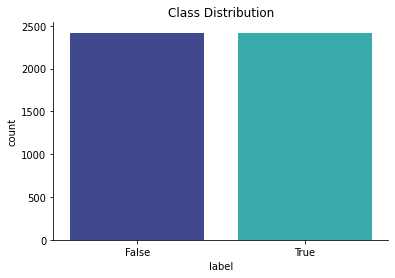

In [ ]:
sns.countplot(x='label', data = dataset_filtered, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [ ]:
dataset_filtered['label'].value_counts()

False    2419
True     2419
Name: label, dtype: int64

In [ ]:
dataset_filtered.to_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/project_dataset.csv')

NameError: ignored

# Analayzing the Datset

In [ ]:
dataset =pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/project_dataset.csv')

In [ ]:
print("Number of data points: ", len(dataset ))
print(dataset['label'].value_counts())
dataset.head()

Number of data points:  4838
False    2419
True     2419
Name: label, dtype: int64


Unnamed: 0 origin                                         tweet_text  label
0           0    ARC  #ÿßŸÑŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑÿ∑ÿ±ŸäŸÇÿ© ÿßŸÑÿµÿ≠Ÿäÿ≠ÿ© ŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑŸÉŸÖÿßŸÖÿßÿ™ ŸÑÿß...  False
1           1    MFH  ŸÉŸàŸÜÿß | ÿ•ÿµÿßÿ®ÿ© ÿ£ŸÜÿ´Ÿâ ŸÜŸÖÿ± ŸÅŸä ÿ≠ÿØŸäŸÇÿ© ÿ≠ŸäŸàÿßŸÜ ÿ®ŸÖÿØŸäŸÜÿ© (ŸÜ...   True
2           2    ARC  ŸÅŸä ŸÖÿ¥ŸáÿØ ŸÖŸáŸäÿ® ÿ™ŸÇÿ¥ÿπÿ± ŸÑŸá ÿßŸÑÿ£ÿ®ÿØÿßŸÜ. ÿÆÿ±ÿ¨ ÿßŸÑÿπÿßŸÖŸÑŸàŸÜ ŸÅŸä...   True
3           3    4IF  ÿ®ÿπÿØ ŸÉÿ≥ÿ± ÿ≠ÿßÿ¨ÿ≤ 10000 ÿ£ÿµÿßÿ®Ÿá ŸÜÿ¥ÿ∑ÿ© ŸÅŸä ŸÇÿ∑ÿ± ÿåÿåÿå Ÿàÿ≤ÿßÿ±ÿ©...   True
4           4    ARC  ÿßŸÑŸàÿßÿ∂ÿ≠ ŸÖŸÜ ÿßŸÑÿ£ÿ±ŸÇÿßŸÖ ÿ£ŸÜ #ŸÉŸàÿ±ŸàŸÜÿß_ÿßŸÑÿ¨ÿØŸäÿØ  #COVID„Éº19...   True

Text(0.5, 1.0, 'Class Distribution')

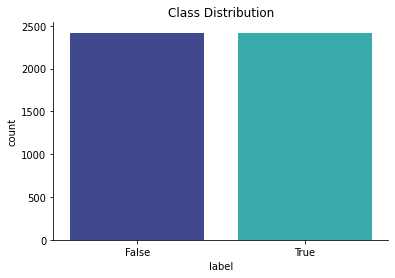

In [ ]:
sns.countplot(x='label', data = dataset, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [ ]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


def preprocess_tweet(tweets):
  tokens = ''
  global emoji_pattern
  for tweet in tweets:
    temp = tweet.strip()
    #temp = re.sub(r'http(\S)+', ' ', temp)
    #temp = re.sub(r'www(\S)+', ' ', temp)
    temp = temp.replace('\n', ' ')
    temp = re.sub(r'[\'\"\#\|\„Éº)]', '',temp)
    temp = re.sub(r'[\#\-\_]', ' ', temp)
    temp = re.sub(r'[\¬ª\¬´]', '', temp)
    temp = re.sub(r'[A-Za-z]', '', temp)
    temp = re.sub(r'[^\w\s]', '', temp)
    #temp=emoji_pattern.sub(r'', temp)
    temp= temp.strip()
    temp= temp.rstrip('\.')
    tokens += temp + ' '

  return tokens


In [ ]:
real_tweets = dataset[dataset['label']==True]['tweet_text']
false_tweets = dataset[dataset['label']==False]['tweet_text']
all_tweets = dataset['tweet_text']

In [ ]:
all_tokens = preprocess_tweet(all_tweets)
real_tokens = preprocess_tweet(real_tweets)
false_tokens = preprocess_tweet(false_tweets)

In [ ]:
## Creating a function to generate a wordcloud to see how the words are distributed
img_count = 0
def get_wordcloud(token_set):
  global img_count

  text= arabic_reshaper.reshape(token_set)
  text= get_display(text)
  wordcloud = WordCloud(width = 1200, height = 600, 
              background_color ='white', stopwords = STOPWORDS, font_path='/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/NotoNaskhArabic-Regular.ttf'
              ,min_font_size = 10).generate(text)

  plt.figure(figsize = (12, 6), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0)
  figname = 'wordcloud'+ str(img_count)
  plt.savefig(figname) 
  img_count+=1


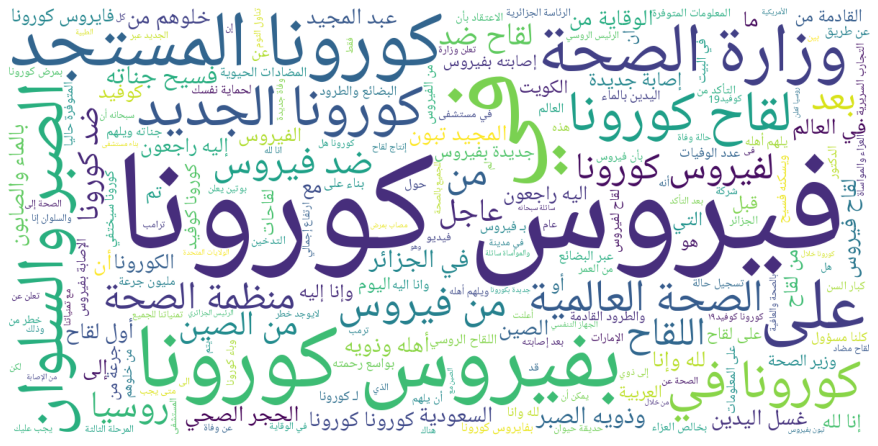

In [ ]:
get_wordcloud(real_tokens)

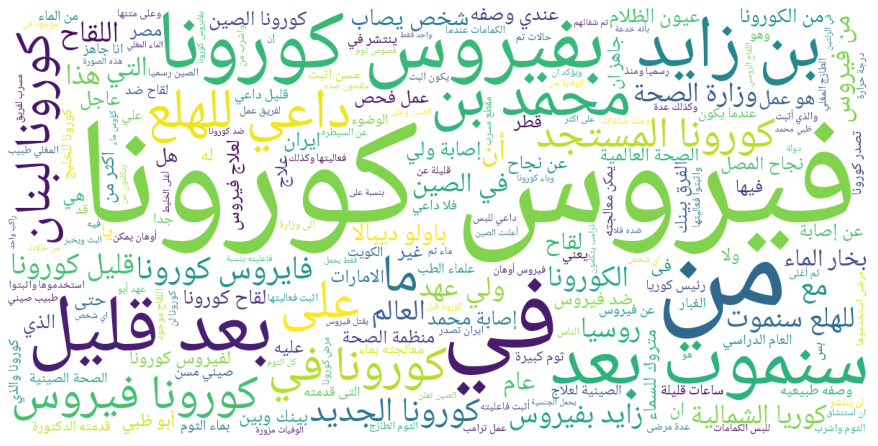

In [ ]:
get_wordcloud(false_tokens)

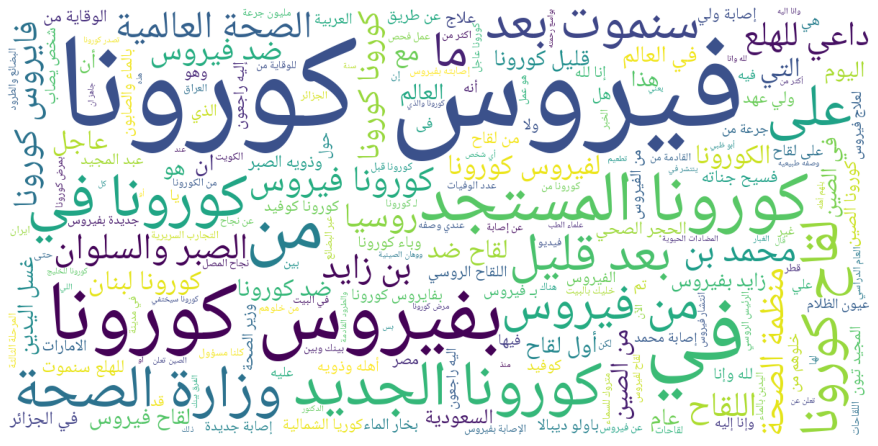

In [ ]:
get_wordcloud(all_tokens)

# Cleaning the Dataset

In [ ]:
!pip install camel-tools


     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 58 kB 2.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.8 MB 10.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 418 kB 38.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 37.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.5 MB 36.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 44.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67 kB 4.8 MB/s 
  Created wheel for camel-tools: filename=camel_tools-1.2.0-py3-none-any.whl size=99048 sha256=2a8df3b89d5b8fb0b900fc519759b7585b1e93455d9e6b79d48c7d1

In [ ]:
!camel_data light

In [ ]:
!git clone https://github.com/aub-mind/arabert

Cloning into 'arabert'...
remote: Enumerating objects: 564, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 564 (delta 188), reused 247 (delta 92), pack-reused 214
Receiving objects: 100% (564/564), 9.16 MiB | 11.18 MiB/s, done.
Resolving deltas: 100% (311/311), done.


In [ ]:
!pip install py4j
!pip install pyarabic

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 198 kB 5.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126 kB 5.2 MB/s 


In [ ]:
!pip install emoji

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 174 kB 5.5 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=5d4a37de57675dd0b3094f3e6563a0c08e405a228aeedc25999168755fc64237
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [ ]:
from transformers import AutoTokenizer, AutoModel
from arabert.preprocess import ArabertPreprocessor

In [ ]:
full_dataset =pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/project_dataset.csv')

In [ ]:
model_name = "aubmindlab/bert-base-arabertv02-twitter"
arabert_prep = ArabertPreprocessor(model_name=model_name, keep_emojis=False, map_hindi_numbers_to_arabic=True )
full_dataset['tweet_text'] = full_dataset['tweet_text'].map(lambda x: arabert_prep.preprocess(x))

'''
text = "ÿ£ŸáŸÖ ÿßŸÑÿ•ÿ±ÿ¥ÿßÿØÿßÿ™ Ÿàÿ∑ÿ±ŸÇ ÿßŸÑŸàŸÇÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ŸÑÿ™ÿ¨ŸÜÿ® ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑŸÖÿ≥ÿ™ÿ¨ÿØ #ŸÉŸàÿ±ŸàŸÜÿß_ÿßŸÑŸÉŸàŸäÿ™ ü¶†üá∞üáº https://t.co/fqf8g6xZMR"
print(arabert_prep.preprocess(text))

text = "ÿßŸÜÿß ŸÖŸÜ ÿßŸÑÿ¥ÿ®ÿßÿ® ÿ•ÿ∞ÿßŸã ÿßŸÜÿß ŸÑÿØŸä ŸÖŸÜÿßÿπŸá ÿ∂ÿØ #ÿßŸÑŸÉŸàÿ±ŸàŸÜÿß Ÿáÿ∞ÿß ŸÉŸÑÿßŸÖ ÿÆÿßÿ∑ÿ¶ ŸäŸÖŸÉŸÜ ŸÑŸÑŸÅŸäÿ±Ÿàÿ≥ ÿ£ŸÜ ŸäÿµŸäÿ® ŸÉŸÑ ÿßŸÑÿ£ÿπŸÖÿßÿ± ŸàŸäŸÖŸÉŸÜ ÿ£ŸÜ Ÿäÿ∂ÿπŸÉ ÿ®ÿßŸÑŸÖÿ≥ÿ™ÿ¥ŸÅŸä ŸÑÿ£ÿ≥ÿßÿ®Ÿäÿπ Ÿà ŸäŸÖŸÉŸÜ ÿßŸÜ ŸäŸÇÿ™ŸÑŸÉ ÿ≠ÿ™Ÿä ÿßÿ∞ÿß ŸÑŸÖ ÿ™ŸÉŸÜ ÿ™ÿπÿßŸÜŸä ŸÖŸÜ ÿ£Ÿä ŸÖÿ±ÿ∂ ŸÇÿØ ÿ™ŸÉŸàŸÜ ÿßŸÑÿÆŸäÿßÿ±ÿßÿ™ ŸÅŸä ÿßÿ™ÿÆÿßÿ∞Ÿáÿß ŸáŸä ÿßŸÑŸÅÿ±ŸÇ ÿ®ŸäŸÜ ÿßŸÑÿ≠Ÿäÿßÿ© ŸàÿßŸÑŸÖŸàÿ™ ÿ≠ÿØŸäÿ´ ÿØŸÉÿ™Ÿàÿ± @DrTedos #ÿ∑ŸÑÿßÿ®_ÿßŸÑÿ´ÿßŸÜŸàŸäÿ©_ÿ®ÿ™ÿ™ŸÅŸäÿ±Ÿàÿ≥"
print(arabert_prep.preprocess(text))
text = "üá®üá≥üá∫üá≤| ŸÖÿ¨ŸÑÿ© ÿßŸÑÿ¨ŸÖÿπŸäÿ© ÿßŸÑÿ∑ÿ®Ÿäÿ© ÿßŸÑÿ£ŸÖÿ±ŸäŸÉŸäÿ© JAMA .. ÿ£ÿ∏Ÿáÿ±ÿ™ ÿ®ŸäÿßŸÜÿßÿ™ ÿßÿÆÿ™ÿ®ÿßÿ±ÿßÿ™ ÿ≥ÿ±Ÿäÿ±Ÿäÿ© .. üî∏Ô∏èÿ£ŸÜ ÿßŸÑŸÑŸÇÿßÿ≠ ÿßŸÑÿ∞Ÿä ÿ∑Ÿàÿ±ÿ™Ÿá ÿßŸÑÿµŸäŸÜ üî∏Ô∏èŸäÿπÿ∑ŸÑ ŸÅŸäÿ±Ÿàÿ≥ COVID-19 .. ŸàŸäÿπÿØ ÿ¢ŸÖŸÜÿßŸã ŸàŸäŸàŸÑÿØ ÿßÿ≥ÿ™ÿ¨ÿßÿ®ÿ© ŸÖŸÜÿßÿπŸäÿ© üî∏Ô∏èŸàŸÑŸÉŸÜ Ÿäÿ¨ÿ® ÿßÿ™ŸÖÿßŸÖ ÿßŸÑŸÖÿ±ÿ≠ŸÑÿ© ÿßŸÑÿ´ÿßŸÑÿ´ÿ© https://t.co/10hqRorXR5"
print(arabert_prep.preprocess(text))'''

'\ntext = "ÿ£ŸáŸÖ ÿßŸÑÿ•ÿ±ÿ¥ÿßÿØÿßÿ™ Ÿàÿ∑ÿ±ŸÇ ÿßŸÑŸàŸÇÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ŸÑÿ™ÿ¨ŸÜÿ® ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿßŸÑŸÖÿ≥ÿ™ÿ¨ÿØ #ŸÉŸàÿ±ŸàŸÜÿß_ÿßŸÑŸÉŸàŸäÿ™ ü¶†üá∞üáº https://t.co/fqf8g6xZMR"\nprint(arabert_prep.preprocess(text))\n\ntext = "ÿßŸÜÿß ŸÖŸÜ ÿßŸÑÿ¥ÿ®ÿßÿ® ÿ•ÿ∞ÿßŸã ÿßŸÜÿß ŸÑÿØŸä ŸÖŸÜÿßÿπŸá ÿ∂ÿØ #ÿßŸÑŸÉŸàÿ±ŸàŸÜÿß Ÿáÿ∞ÿß ŸÉŸÑÿßŸÖ ÿÆÿßÿ∑ÿ¶ ŸäŸÖŸÉŸÜ ŸÑŸÑŸÅŸäÿ±Ÿàÿ≥ ÿ£ŸÜ ŸäÿµŸäÿ® ŸÉŸÑ ÿßŸÑÿ£ÿπŸÖÿßÿ± ŸàŸäŸÖŸÉŸÜ ÿ£ŸÜ Ÿäÿ∂ÿπŸÉ ÿ®ÿßŸÑŸÖÿ≥ÿ™ÿ¥ŸÅŸä ŸÑÿ£ÿ≥ÿßÿ®Ÿäÿπ Ÿà ŸäŸÖŸÉŸÜ ÿßŸÜ ŸäŸÇÿ™ŸÑŸÉ ÿ≠ÿ™Ÿä ÿßÿ∞ÿß ŸÑŸÖ ÿ™ŸÉŸÜ ÿ™ÿπÿßŸÜŸä ŸÖŸÜ ÿ£Ÿä ŸÖÿ±ÿ∂ ŸÇÿØ ÿ™ŸÉŸàŸÜ ÿßŸÑÿÆŸäÿßÿ±ÿßÿ™ ŸÅŸä ÿßÿ™ÿÆÿßÿ∞Ÿáÿß ŸáŸä ÿßŸÑŸÅÿ±ŸÇ ÿ®ŸäŸÜ ÿßŸÑÿ≠Ÿäÿßÿ© ŸàÿßŸÑŸÖŸàÿ™ ÿ≠ÿØŸäÿ´ ÿØŸÉÿ™Ÿàÿ± @DrTedos #ÿ∑ŸÑÿßÿ®_ÿßŸÑÿ´ÿßŸÜŸàŸäÿ©_ÿ®ÿ™ÿ™ŸÅŸäÿ±Ÿàÿ≥"\nprint(arabert_prep.preprocess(text))\ntext = "üá®üá≥üá∫üá≤| ŸÖÿ¨ŸÑÿ© ÿßŸÑÿ¨ŸÖÿπŸäÿ© ÿßŸÑÿ∑ÿ®Ÿäÿ© ÿßŸÑÿ£ŸÖÿ±ŸäŸÉŸäÿ© JAMA .. ÿ£ÿ∏Ÿáÿ±ÿ™ ÿ®ŸäÿßŸÜÿßÿ™ ÿßÿÆÿ™ÿ®ÿßÿ±ÿßÿ™ ÿ≥ÿ±Ÿäÿ±Ÿäÿ© .. üî∏Ô∏èÿ£ŸÜ ÿßŸÑŸÑŸÇÿßÿ≠ ÿßŸÑÿ∞Ÿä ÿ∑Ÿàÿ±ÿ™Ÿá ÿßŸÑÿµŸäŸÜ üî∏Ô∏èŸäÿπÿ∑ŸÑ ŸÅŸäÿ±Ÿàÿ≥ COVID-19 .. Ÿ

In [ ]:
full_dataset.sample(50)

Unnamed: 0 origin                                         tweet_text  \
3503        3503    ARC  ÿßŸÑÿ∫ÿ±ÿ∫ÿ±ÿ© ÿ®ÿßŸÑŸÖÿßÿ° ŸàÿßŸÑŸÖŸÑÿ≠ ÿ™ŸÇÿ∂Ÿä ÿπŸÑŸä ÿßŸÑŸÅŸäÿ±Ÿàÿ≥ ŸÑŸäÿ≥ ŸÑŸÑŸÖ...   
1183        1183    ARC  ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿµŸäŸÜŸä Ÿäÿ≤Ÿàÿ± ÿßÿ≠ÿØÿßŸÑŸÖÿ≥ÿßÿ¨ÿØ ŸàŸäÿ∑ŸÑÿ® ŸÖŸÜ ÿßÿ¶ŸÖÿ© ÿßŸÑ...   
3592        3592    4IF  ÿ≥ŸÜÿØ Ÿàÿ∞ÿÆÿ± 14953 ŸÖÿ™ÿ∑Ÿàÿπ ÿ≠ÿ™Ÿâ ÿßŸÑÿ¢ŸÜ ŸÖŸÜ ŸáŸÑ # ŸÇÿ∑ÿ± ŸàÿßŸÑŸÖ...   
1006        1006    ARC  ŸÅŸäÿØŸäŸà ŸÑÿµÿØÿßŸÖ ÿ≠ÿ≥ŸäŸÜ Ÿäÿ™ÿ≠ÿØÿ´ ÿπŸÜ ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿπŸÜÿØŸÖÿß Ÿá...   
2742        2742    4IF  ÿßÿ≠ÿØŸâ ÿ∑ÿßÿ¶ÿ±ÿßÿ™ ÿßŸÑÿ¥ÿ≠ŸÜ ÿßŸÑŸÇÿ∑ÿ±Ÿäÿ© ÿßŸÑŸÇÿßÿØŸÖÿ© ŸÖŸÜ ÿ•Ÿäÿ±ÿßŸÜ ÿ™ÿ≠ŸÖ...   
4277        4277    ARC  ŸÖŸÜ ÿ¨Ÿáÿ© ÿ£ÿÆÿ±Ÿâ ÿå ÿ£Ÿàÿ∂ÿ≠ ÿßŸÑÿ≥ÿØŸäÿ≥ ÿ£ŸÜ ŸÇÿ±ÿßÿ± ÿ•ÿ∫ŸÑÿßŸÇ ÿßŸÑÿ≠ÿ±ŸÖŸä...   
3229        3229    ARC  [ŸÖÿ≥ÿ™ÿÆÿØŸÖ] ÿ™ÿ±ÿ¨ŸÖÿ© ÿßŸÑÿπŸÜŸàÿßŸÜ ŸÑŸäÿ≥ ŸÑŸáÿß ÿπŸÑÿßŸÇÿ© ÿ®ÿ≥ÿßŸÜÿ¥Ÿäÿ≤ ÿß...   
4377        4377    4IF  ÿ∑ÿßÿ±ŸÇ ÿßŸÑŸÖÿ≤ÿ±ŸÖ : Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿµÿ≠ÿ© ÿ™ÿ™ŸàÿßÿµŸÑ Ÿàÿ™ÿ™ÿßÿ®ÿπ ŸÖÿπ ÿ¨ŸÖŸä...   
4733        4733    ARC  # ÿπÿßÿ¨ŸÑ # ŸÅÿßŸäÿ±Ÿàÿ≥ # ŸÉŸàÿ±ŸàŸÜÿß # covid19 # ÿßŸÑÿµŸäŸÜ ÿßÿ∫ŸÑ...   
3407        3407    4IF  ÿ±ÿ¶Ÿäÿ≥ ŸÑÿ¨ŸÜÿ© ŸÖŸàÿßÿ¨Ÿáÿ© # ŸÉŸàÿ±ŸàŸÜÿß Ÿäÿ™ŸàŸÇÿπ ÿ•ŸÜÿ™ÿßÿ¨ ŸÑŸÇÿßÿ≠ ŸÅŸä ...   
86            86    ARC  [ŸÖÿ≥ÿ™ÿÆÿØŸÖ] ŸäŸàÿ¨ÿØ ÿ™ŸÇÿßÿ±Ÿäÿ± ÿ™ŸÇŸàŸÑ ÿ£ŸÜ ÿ£ŸÉŸÑ ÿßŸÑÿµŸäŸÜŸäŸäŸÜ ŸÑŸÑÿÆŸÅ...   
559          559    ARC  # Ÿàÿ≤ÿßÿ±Ÿá _ ÿßŸÑÿ™ÿ±ÿ®ŸäŸá [ŸÖÿ≥ÿ™ÿÆÿØŸÖ] ŸÑÿ®ŸÜÿßŸÜ ÿ™ŸÜŸáŸä ÿßŸÑÿπÿßŸÖ ÿßŸÑ...   
3771        3771    MFH  # ŸÉŸàÿ±ŸàŸÜÿß # COVID19 ÿ™ŸÖÿØŸäÿØ ÿ•ÿ¨ÿ±ÿßÿ°ÿßÿ™ ÿßŸÑÿ≠ÿ¨ÿ± ÿßŸÑÿµÿ≠Ÿä ŸÅ...   
3665        3665    ARC  # ŸáŸÑ _ ŸÉŸÜÿ™ _ ÿ™ÿπŸÑŸÖ _ ÿßŸÜŸà ŸÉŸàÿ±ŸàŸÜÿß ŸÑÿß ŸäŸÜÿ™ŸÇŸÑ ÿπŸÜ ÿ∑ÿ±Ÿä...   
3939        3939    4IF  ŸÅŸä ÿ™ÿ∑Ÿàÿ± ÿ®ÿßÿ±ÿ≤ ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿ¨ŸáŸàÿØ ÿßŸÑÿπÿßŸÑŸÖŸäÿ© ÿßŸÑÿ±ÿßŸÖŸäÿ©...   
3846        3846    MFH  # Ÿäÿ≠ÿØÿ´ _ ŸÅŸä _ ÿ®Ÿäÿ¥ÿ© ŸÉŸàÿ±ŸàŸÜÿß ŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ÿßŸÑŸÖŸÑŸÉ ÿπÿ®ÿØÿßŸÑŸÑŸá...   
2146        2146    ARC  [ŸÖÿ≥ÿ™ÿÆÿØŸÖ] [ŸÖÿ≥ÿ™ÿÆÿØŸÖ] [ŸÖÿ≥ÿ™ÿÆÿØŸÖ] [ŸÖÿ≥ÿ™ÿÆÿØŸÖ] [ŸÖÿ≥ÿ™ÿÆÿØŸÖ] ÿπ...   
684          684    ARC  ÿØÿ±ÿßÿ≥ÿ© ÿ¨ÿØŸäÿØÿ© ŸÑ [ŸÖÿ≥ÿ™ÿÆÿØŸÖ] ÿ™ŸÇÿØÿ± ÿ£ŸÜ 8 . 3 ŸÖŸÑÿßŸäŸäŸÜ ÿ¥ÿÆ...   
4539        4539    4IF  ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿ≥ÿ§ÿßŸÑŸÉŸÖ ÿπŸÜ ÿ≥ÿ®ÿ® ÿßŸÑÿßÿ±ÿ™ŸÅÿßÿπ ŸÅŸáŸà ÿ®ÿ≥ÿ®ÿ® Ÿàÿ¨ŸàÿØ ÿ£...   
3243        3243    ARC             ÿßŸÑÿ¥ŸáŸäÿØ ÿµÿØÿßŸÖ ÿ≠ÿ≥ŸäŸÜ Ÿäÿ™ÿ≠ÿØÿ´ ÿπŸÜ ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß   
225          225    4IF  | ŸÖÿ¨ŸÑÿ© ÿßŸÑÿ¨ŸÖÿπŸäÿ© ÿßŸÑÿ∑ÿ®Ÿäÿ© ÿßŸÑÿ£ŸÖÿ±ŸäŸÉŸäÿ© JAMA . . ÿ£ÿ∏Ÿáÿ±ÿ™...   
2296        2296    ARC  ŸäŸáŸàÿØ ŸÅŸä ŸÜŸäŸàŸäŸàÿ±ŸÉ Ÿäÿ¥ŸäÿπŸàŸÜ ÿ¨ŸÜÿßÿ≤ÿ© ÿ∑ŸÑÿ®ÿ™ ŸÖŸÜŸáŸÖ ÿßŸÑÿ¥ÿ±ÿ∑ÿ© ...   
3532        3532    4IF  ÿπÿßÿ¨ŸÑ - # ÿ±Ÿàÿ≥Ÿäÿß ÿ™ÿπŸÑŸÜ ÿ±ÿ≥ŸÖŸäÿß ÿßŸÑÿ®ÿØÿ° ŸÅŸä ÿ•ŸÜÿ™ÿßÿ¨ ÿßŸÑŸÑŸÇÿß...   
2305        2305    ARC  # ŸÉŸàÿ±ŸàŸÜÿß . . ÿ•ŸÑÿ™ŸÇÿ∑ÿ™ Ÿáÿ∞Ÿá ÿßŸÑÿµŸàÿ±ÿ© ÿµÿ®ÿßÿ≠ ŸäŸàŸÖ ÿßŸÑÿ¨ŸÖÿπÿ©...   
3072        3072    ARC  ŸÖŸÉÿ™ÿ¥ŸÅ ŸÅŸäÿ±Ÿàÿ≥ ÿßŸÑÿ•ŸäÿØÿ≤ : ŸÉŸàÿ±ŸàŸÜÿß ÿµŸÜÿπ ŸÅŸä ŸÖÿÆÿ™ÿ®ÿ± ŸàŸÑÿß ÿπ...   
756          756    ARC  ÿ£ÿπŸÑŸÜÿ™ ÿßŸÑÿµŸäŸÜ ÿ±ÿ≥ŸÖŸäÿß ŸàŸÖŸÜÿ∞ ÿ≥ÿßÿπÿßÿ™ ŸÇŸÑŸäŸÑÿ© ÿπŸÜ ŸÜÿ¨ÿßÿ≠ ÿßŸÑŸÖ...   
4727        4727    4IF  15 , 000 ŸÖÿ™ÿ∑Ÿàÿπ ŸÖŸÜ 107 ÿ¨ŸÜÿ≥Ÿäÿßÿ™ ŸÖÿÆÿ™ŸÑŸÅÿ© Ÿäÿ¥ÿßÿ±ŸÉŸàŸÜ ÿ≠ÿß...   
2732        2732    MFH  ÿßŸÑŸÖÿßŸÜŸäÿß ÿ£Ÿàÿ∂ÿ≠ ÿßÿ∑ÿ®ÿßÿ° ŸÅŸä ŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ŸÅÿ±ÿßŸäÿ®Ÿàÿ±ÿ∫ ÿßŸÑÿ¨ÿßŸÖÿπŸä ...   
2627        2627    ARC  ŸÇÿ∑ÿ± ŸÅÿßÿ™ÿ≠ÿ© ÿßŸÑŸÖÿ¨ÿßŸÑ ŸÑŸÑÿ≥ŸÅÿ± ŸÖŸÜ Ÿà ÿ•ŸÑŸâ ÿ•Ÿäÿ±ÿßŸÜ ŸÖÿπ ÿßŸÜ ÿßŸÑ...   
2096        2096    MFH  Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿµÿ≠ÿ© : ÿ™ÿ≥ÿ¨ŸäŸÑ 69 ÿ•ÿµÿßÿ®ÿßÿ™ ÿ¨ÿØŸäÿØÿ© ÿ® # ŸÉŸàÿ±ŸàŸÜÿß...   
1505        1505    4IF  # ÿ®Ÿàÿ™ŸäŸÜ ŸäÿπŸÑŸÜ ŸÖŸàÿßŸÅŸÇÿ© Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿµÿ≠ÿ© ÿßŸÑÿ±Ÿàÿ≥Ÿäÿ© ÿπŸÑŸâ ÿßŸÑ...   
4003        4003    4IF  ÿ≠ÿ±ÿ® ÿßŸÑŸÇŸÜÿµŸÑŸäÿßÿ™ ÿ®ŸäŸÜ # ÿ£ŸÖÿ±ŸäŸÉÿß ŸàÿßŸÑÿµŸäŸÜ Ÿäÿ£ÿÆÿ∞ ŸÖŸÜÿ≠Ÿâ ÿ™ÿµ...   
1152        1152    MFH  ŸÅŸä ÿ≠ÿßŸÑÿ© ŸÉŸàÿ±ŸàŸÜÿß ÿπŸÜÿß ÿ®ÿßŸÑÿ∂Ÿäÿπÿ© ( ÿßŸÑÿ≠ŸÑŸàÿ≥Ÿäÿ© ) # ŸÑÿß _...   
1711        1711    4IF  ÿ±Ÿàÿ≥Ÿäÿß ÿ™ÿπŸÑŸÜ ÿßŸÜŸáÿß ÿ∑Ÿàÿ±ÿ™ ÿßŸàŸÑ ŸÑŸÇÿßÿ≠ ÿ∂ÿØÿØ ŸÉŸàÿ±ŸàŸÜÿß ŸàÿßŸÑÿ±ÿ¶...   
4164        4164    ARC  ŸÉŸàÿ±ŸàŸÜÿß . . ÿ•ŸÑÿ™ŸÇÿ∑ÿ™ Ÿáÿ∞Ÿá ÿßŸÑÿµŸàÿ±ÿ© ÿµÿ®ÿßÿ≠ ÿßŸÑŸäŸàŸÖ

In [ ]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


def preprocess_tweet(tweet):
  temp = tweet.strip()
  temp = re.sub(r'http(\S)+', ' ', temp)
  temp = re.sub(r'www(\S)+', ' ', temp)
  temp = temp.replace('\n', ' ')
  temp = re.sub(r'[\'\"\#\|\„Éº\*]', '',temp)
  temp = re.sub(r'[\#\-\_]', ' ', temp)
  temp = re.sub(r'[\¬ª\¬´]', '', temp)
  temp = re.sub(r'(@[A-Za-z0-9]* *[A-Za-z0-9]*)?', "", temp)
  temp = re.sub(r'\. *(\.)+', "\.", temp)
  temp = re.sub(r'\!(\!)+', "\!", temp)
  temp = re.sub(r'\?(\?)+', "\?", temp)
  temp = re.sub(r'\ÿü(\ÿü)+', "ÿü", temp)
  temp = re.sub(r'\\', "", temp)
  #temp = re.sub(r'(ü§∑‚Äç‚ôÇÔ∏è|‚ö†Ô∏è|‚úîÔ∏è|‚úç)', "", temp)
  temp = re.sub(r'\ÿå *(\ÿå)+', "\ÿå ", temp)
  temp = re.sub(r'[^\u0621-\u064A\u0660-\u0669A-Za-z0-9\?\ÿü\.\ÿå\!\:\;\ÿõ ]', " ", temp)
  temp = re.sub(r'URL', ' ', temp)
  temp = re.sub(r'Ÿ†', '', temp)
  
  #temp = re.sub(r'[^\w\s]', '', temp)
  temp=emoji_pattern.sub(r'', temp)
  temp= temp.strip()
  temp= temp.rstrip('\.')

  return temp

In [ ]:
full_dataset['tweet_text'] = full_dataset['tweet_text'].map(lambda x: preprocess_tweet(str(x)))

In [ ]:
full_dataset=full_dataset.drop(labels='Unnamed: 0', axis=1)

In [ ]:
full_dataset.sample(100)

origin                                         tweet_text  label
1492    ARC  ÿ¥Ÿà ÿµÿ≠ÿ© ŸáÿßŸä ÿßŸÑÿÆÿ®ÿ±ÿü  ŸÖ ÿµŸäÿ®ÿ© ÿ™ÿ≠ŸÑ ÿπŸÑŸâ ÿßŸÑÿ•ŸÖÿßÿ±ÿßÿ™. ÿ•ÿµ...  False
4618    ARC  ÿ¥ÿßŸáÿØ ÿ±ÿ≠ŸÑÿ© ÿßŸÑÿÆÿ∑Ÿàÿ∑ ÿßŸÑÿßÿ´ŸäŸàÿ®Ÿäÿ© ŸÇÿ®ŸÑ ŸÇŸÑŸäŸÑ ŸÇÿßÿØŸÖÿ© ŸÖŸÜ ÿ•...  False
764     ARC  ÿ•ÿµÿßÿ®ÿ© ÿ±ÿ¶Ÿäÿ≥ Ÿàÿ≤ÿ±ÿßÿ° ÿ®ÿ±Ÿäÿ∑ÿßŸÜŸäÿß ÿ®Ÿàÿ±Ÿäÿ≥ ÿ¨ŸàŸÜÿ≥ŸàŸÜ ÿ®ŸÅŸäÿ±Ÿàÿ≥ ...   True
4785    4IF  ÿ£ÿÆÿ®ÿßÿ± ÿ≥ÿßÿ±ÿ©. ÿ£ÿπŸÑŸÜÿ™ ÿ±Ÿàÿ≥Ÿäÿß ÿ£ŸÜ ŸÑŸÇÿßÿ≠ ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ÿß...   True
411     ARC  ŸÉŸàÿ±Ÿäÿß ÿßŸÑÿ¥ŸÖÿßŸÑŸäÿ© : ÿßÿπÿØÿßŸÖ ÿ£Ÿä ÿ¥ÿÆÿµ Ÿäÿµÿßÿ® ÿ®ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±Ÿà...  False
...     ...                                                ...    ...
2260    ARC  ÿ£ÿπŸÑŸÜÿ™ ÿßŸÑÿµŸäŸÜ ÿ±ÿ≥ŸÖŸäÿß ŸàŸÖŸÜÿ∞ ÿ≥ÿßÿπÿßÿ™ ŸÇŸÑŸäŸÑÿ© ÿπŸÜ ŸÜÿ¨ÿßÿ≠ ÿßŸÑŸÖ...  False
1039    4IF  ÿ®ÿßŸÑÿ¥ŸÅÿß  ÿØÿ±ÿßÿ≥ÿ© ŸáŸàŸÑŸÜÿØŸäÿ©: ŸÑŸÇÿßÿ≠ ÿßŸÑÿ≥ŸÑ ŸÖÿ≠ŸÅÿ≤ ÿπÿßŸÖ ŸÑŸÑŸÖŸÜ...   True
4370    MFH  ÿßŸÑŸÅÿ±ŸÇ ÿ®ŸäŸÜŸÜÿß Ÿàÿ®ŸäŸÜ ŸÑŸä ŸÖÿπŸà ŸÉŸàÿ±ŸàŸÜÿß ÿåÿßŸÜŸà ŸáŸà ÿπŸÖŸÑ ŸÅÿ≠ÿµ...  False
991     MFH  ÿßŸÑŸÜŸáÿßÿ±ÿØÿ© ÿ™ŸÖ ÿßŸÑÿ•ÿπŸÑÿßŸÜ ÿ±ÿ≥ŸÖŸäÿß  ÿπŸÜ ÿ•ÿµÿßÿ®ÿ© ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ¨...   True
107     ARC  ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿ™ÿ±ŸÖÿ® ŸÖÿ≥ÿßÿ° ÿ£ŸÖÿ≥ ÿÆŸÑÿßŸÑ ÿßŸÑŸÖÿ§ÿ™ŸÖÿ± ÿßŸÑÿµÿ≠ŸÅŸä ÿßŸÑŸäŸàŸÖ...   True

[100 rows x 3 columns]

In [ ]:
full_dataset.to_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/project_dataset_preprocessed.csv')